# Classification with Decision Trees

### Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [14]:
import pandas as pd
import seaborn as sns


# import diabetes dataset
df_diabetes = pd.read_csv("./datasets/diabetes.csv")

# view first lines of the dataset
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

#### Activity 1.        

* Split the data into training and test sets. To build the train and test sets, you can use the function `train_test_split` from the module `model_selection` of `scikit-learn`. Make sure that the test set corresponds to 1/10th of your data. For reproducibility, set `random_state` to some fixed value.


**Note:** Keep in mind that the test data should not be used for any design or validation decisions.

---

In [15]:
from sklearn.model_selection import train_test_split # Import train_test_split function

#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df_diabetes[feature_cols].values # Features
y = df_diabetes[['Outcome']].values # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=100)


---

#### Activity 2.  

* Fit the decision tree classifier to the training set from Activity 1. The algorithm can be imported from the `sklearn.tree` library under the name `DecisionTreeClassifier`.

In [16]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
d_tree = DecisionTreeClassifier()

# Train Decision Tree Classifer
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Activity 3.  

* Print the training accuracy
* Print the test set accuracy
* Print the confusion matrix of the test set
* Print the test set precision
* Print the test set recall
* Print the test set f1 score

These algorithms to compute these metrics can be imported from the `sklearn.metrics`.

In [17]:
import sklearn.metrics as metrics

print("Training accuracy: ", d_tree.score(X_train, y_train))

print("Test set accuracy: ", d_tree.score(X_test, y_test))

print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, d_tree.predict(X_test)))

print("Test set precision: ", metrics.precision_score(y_test, d_tree.predict(X_test)))

print("Test set recall: ", metrics.recall_score(y_test, d_tree.predict(X_test)))

print("Test set f1 score: ", metrics.f1_score(y_test, d_tree.predict(X_test)))

Training accuracy:  1.0
Test set accuracy:  0.6753246753246753
Confusion matrix:
[[37 10]
 [15 15]]
Test set precision:  0.6
Test set recall:  0.5
Test set f1 score:  0.5454545454545454


### Activity 4.

Visualize a text representation of the learned Decision Tree. The decision tree can be visualized from the `sklearn.tree` library with the `export_text` method.

In [18]:
from sklearn.tree import export_text

tree_text = export_text(d_tree)
print(tree_text)

|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- feature_5 <= 30.95
|   |   |   |--- feature_0 <= 7.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  7.50
|   |   |   |   |--- class: 1
|   |   |--- feature_5 >  30.95
|   |   |   |--- feature_6 <= 0.96
|   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |--- feature_5 <= 31.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  31.10
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_5 <= 49.05
|   |   |   |   |   |   |   |   |--- feature_4 <= 36.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 34.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 111.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  111.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 

### Activity 5.

Plot the learned Decision Tree with matplotlib. The decision tree can be visualized from the `sklearn.tree` library with the `plot_tree` method.

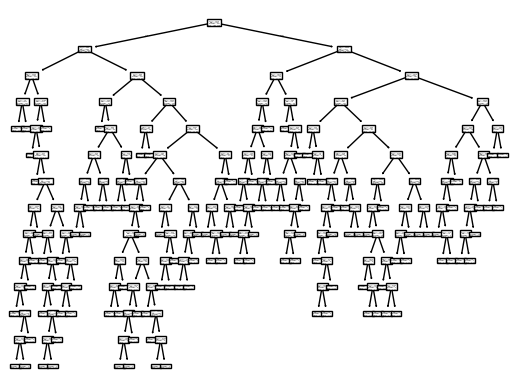

In [19]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plot_tree(d_tree)
plt.show()

## Improving the performance of a Decision Tree

#### Activity 6.  

* Fit the decision tree classifier to the training set from Activity 1, but now limit the maximum depth of the learned tree. Instantiate the `DecisionTreeClassifier` class and pass the parameter `max_depth=3`.

In [20]:
d_tree = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### Activity 7.  

* Print the training accuracy
* Print the test set accuracy
* Print the confusion matrix of the test set
* Print the test set precision
* Print the test set recall
* Print the test set f1 score


Training accuracy:  0.7727930535455861
Test set accuracy:  0.7792207792207793
Confusion matrix:
Test set precision:  0.76
Test set recall:  0.6333333333333333
Test set f1 score:  0.6909090909090909


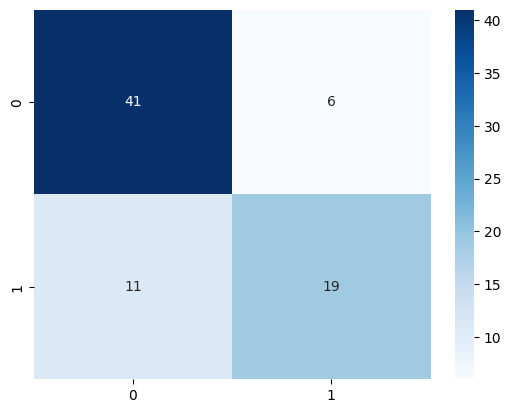

In [21]:
import sklearn.metrics as metrics

y_predict = d_tree.predict(X_test)

print("Training accuracy: ", d_tree.score(X_train, y_train))

print("Test set accuracy: ", d_tree.score(X_test, y_test))

print("Confusion matrix:")
Conf_Matrix = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(Conf_Matrix, annot=True, fmt='d', cmap='Blues')


print("Test set precision: ", metrics.precision_score(y_test, y_predict))

print("Test set recall: ", metrics.recall_score(y_test, y_predict))

print("Test set f1 score: ", metrics.f1_score(y_test, y_predict))

### Activity 8.

Plot the learned Decision Tree with matplotlib. The decision tree can be visualized from the `sklearn.tree` library with the `plot_tree` method.

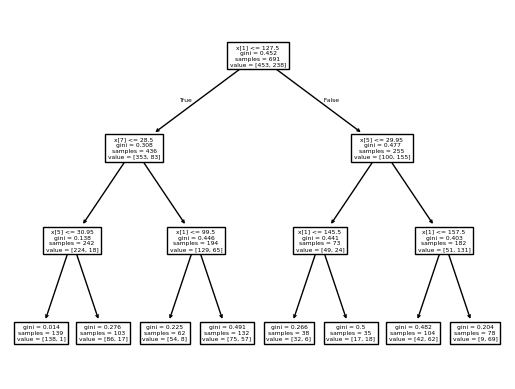

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(d_tree)
plt.show()


### Activity 9.

Test different values of `max_depth` and try to find the best value.

Training accuracies =  [0.7351664254703328, 0.7713458755426917, 0.7727930535455861, 0.788712011577424, 0.8437047756874095, 0.8581765557163531, 0.9073806078147613, 0.9435600578871202, 0.9551374819102749]
Test accuracies =  [0.7402597402597403, 0.7792207792207793, 0.7792207792207793, 0.7532467532467533, 0.7662337662337663, 0.7142857142857143, 0.6753246753246753, 0.7012987012987013, 0.6753246753246753]


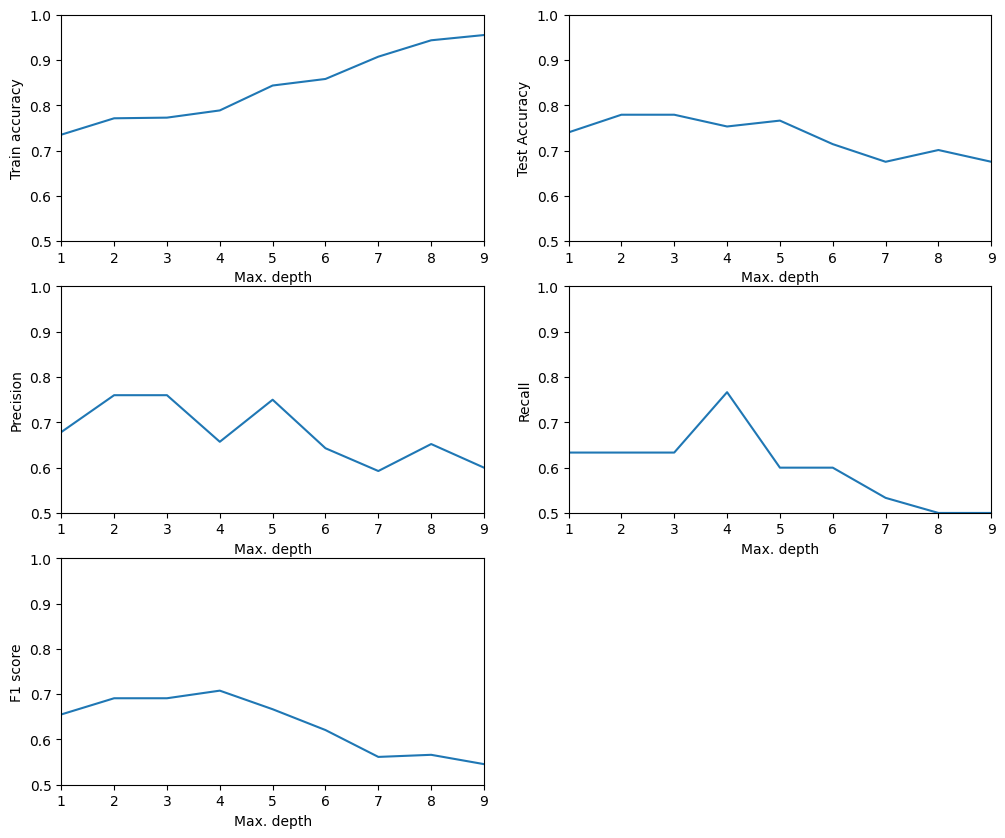

In [25]:
train_acc = []
accuracy = []
precision = []
recall = []
f1 = []

depths = [1, 2, 3, 4, 5, 6, 7, 8, 9]


for depth in depths:
    d_tree = DecisionTreeClassifier(max_depth=depth)
    d_tree.fit(X_train, y_train)
    train_acc.append(d_tree.score(X_train, y_train))
    accuracy.append(d_tree.score(X_test, y_test))
    precision.append(metrics.precision_score(y_test, d_tree.predict(X_test)))
    recall.append(metrics.recall_score(y_test, d_tree.predict(X_test)))
    f1.append(metrics.f1_score(y_test, d_tree.predict(X_test)))
    
print('Training accuracies = ', train_acc)
print('Test accuracies = ', accuracy)

    
fig2 = plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(depths, train_acc)
plt.axis([1, 9, 0.5, 1.0])
plt.xlabel('Max. depth')
plt.ylabel('Train accuracy')

plt.subplot(3, 2, 2)
plt.plot(depths, accuracy)
plt.axis([1, 9, 0.5, 1.0])
plt.xlabel('Max. depth')
plt.ylabel('Test Accuracy')

plt.subplot(3, 2, 3)
plt.plot(depths, precision)
plt.axis([1, 9, 0.5, 1.0])
plt.xlabel('Max. depth')
plt.ylabel('Precision')

plt.subplot(3, 2, 4)
plt.plot(depths, recall)
plt.axis([1, 9, 0.5, 1.0])
plt.xlabel('Max. depth')
plt.ylabel('Recall')

plt.subplot(3, 2, 5)
plt.plot(depths, f1)
plt.axis([1, 9, 0.5, 1.0])
plt.xlabel('Max. depth')
plt.ylabel('F1 score')

plt.show()